<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 3*

# 📝 Assignment

# 신뢰구간

서울시 기간별 시간평균 대기환경 정보 데이터셋을 이용합니다.

<img src='https://user-images.githubusercontent.com/6457691/89852263-740add80-dbc9-11ea-9e6b-8059b3f7e479.png'>

<https://data.seoul.go.kr/dataList/OA-2221/S/1/datasetView.do>

### `2020년 3월`의 송파구 데이터만 사용합니다.



## 1. 데이터셋을 불러오세요

  - 데이터는 `df`라는 변수에 저장되어야 하며
  - Feature로는 `측정일시`, `측정소명`, `오존(ppm)` 만 사용합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='CP949')
df = df[df['측정소명']=='송파구']
df = df[df['측정일시'].astype(str).str.contains('202003')]
df = df[['측정일시','측정소명','오존(ppm)']]

# 결과
df

,측정일시,측정소명,오존(ppm)
24,202003312300,송파구,0.020
49,202003312200,송파구,0.021
73,202003312100,송파구,0.025
99,202003312000,송파구,0.032
124,202003311900,송파구,0.034
...,...,...,...
18499,202003010400,송파구,0.002
18524,202003010300,송파구,0.002
18547,202003010200,송파구,0.002
18573,202003010100,송파구,0.002


## 2. 데이터셋으로 부터 2개의 샘플을 생성하세요.

- `s1`에 저장된 1개는 20개의 데이터, `s2`에 저장된 다른 1개는 200개이며 
- 두 경우 모두 `random_state`로 `42`를 설정합니다.

In [ ]:
#샘플 생성
s1 = df.sample(n = 20,random_state=42) #random_state 는 seed number
s2 = df.sample(n = 200,random_state=42)

## 3. 두 샘플데이터에 대해서 `오존(ppm)`항목의 표본 평균을 계산하세요.

In [ ]:
m1 = s1['오존(ppm)'].mean()
m1

0.021750000000000002

In [ ]:
m2 = s2['오존(ppm)'].mean()
m2

0.02291999999999995

## 4. 위에서 추정한 값들을 바탕으로, 95%에 해당하는 신뢰구간을 `CI1과` `CI2`에 계산하세요.

  - `ddof`는 `1`을 사용합니다.

In [ ]:
import numpy as np
from scipy.stats import t

n1 = len(s1)
dof1 = n1 -1

#s1 표준편차
std1 = np.std(s1['오존(ppm)'], ddof = 1) #ddof =1은 표준편차 계산 시 (n-1)로 나누라는 의미

#표준오차
std_e1 = std1 / n1 ** 0.5

#신뢰구간
CI1 = t.interval(.95, dof1, loc = m1, scale = std_e1)

#결과
CI1

(0.015060460813957323, 0.02843953918604268)

In [ ]:
n2 = len(s2)
dof2 = n2-1

#s2 표준편차
std2 = np.std(s2['오존(ppm)'], ddof = 1) 

#표준오차
std_e2 = std2/n2 ** 0.5

#신뢰구간
CI2 = t.interval(0.95,dof2, loc = m2, scale = std_e2)

#결과
CI2

(0.021006515262626202, 0.0248334847373737)

## 5. `plt.bar`를 사용하여 다음과 같은 신뢰구간 시각화를 그리세요.
  - 이때 보라색 선에 해당 하는 값을 `pop_mean`에 저장하세요.
  - `colors = '#4000c7'`을 사용하세요.

<img src='https://i.imgur.com/3orh30m.png'>






In [ ]:
pop_mean = df['오존(ppm)'].mean()
pop_mean

0.023588709677419318

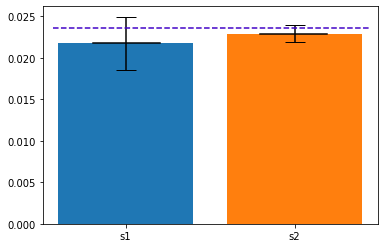

In [ ]:
import matplotlib.pyplot as plt 


plt.bar(x = 's1', height = m1, yerr = std_e1, capsize=10)
plt.bar(x = 's2', height = m2,yerr=std_e2, capsize =10)
plt.axhline(m1, color = 'black', xmin = 0.15, xmax = 0.35)
plt.axhline(m2, color = 'black', xmin = 0.65, xmax = 0.85)
plt.axhline(pop_mean, color = '#4000c7',linestyle='--',xmin = 0.03, xmax = 0.98)


# 🔥 도전과제
> 아래 두 문제를 모두 다 하시면 됩니다.

## 1. [plotly](https://plotly.com/) 나 [seaborn](http://seaborn.pydata.org/index.html), [bokeh](https://docs.bokeh.org/en/latest/index.html) 등 다른 시각화 라이브러리를 선택하여 앞에서 그렸던 신뢰구간을 해당 라이브러리를 선택하여 그려보세요.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0, flags=flags)


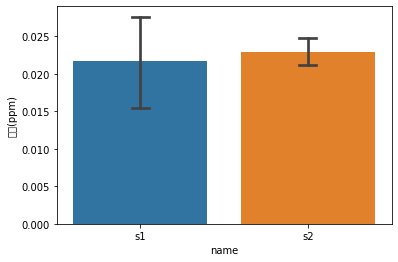

In [ ]:
import seaborn as sns

s1['name'] = 's1'
s2['name'] = 's2'
oz = pd.concat([s1,s2])
oz

sns.barplot(data = oz, x='name', y = '오존(ppm)',capsize=0.1)


## 2. 위 데이터의 `초미세먼지` 데이터를 사용하여, 큰 수의 법칙과, 중심극한가설을 표현하는 코드를 작성하세요.

In [ ]:
import pandas as pd
df2 = pd.read_csv('/content/drive/MyDrive/서울시_기간별_시간평균_대기환경_정보_2020.03.csv', encoding='CP949')
df2 = df2[df2['측정소명']=='송파구']
df2 = df2[df2['측정일시'].astype(str).str.contains('202003')]

df2 = df2['초미세먼지(㎍/㎥)']

#큰 수의 법칙 : sample 데이터 수가 커질수록 샘플의 통계치는 모집단의 모수와 같아짐
np.random.choice(df2, 5).var()

272.4

In [ ]:
np.random.choice(df2, 50).var()

104.37440000000001

In [ ]:
np.random.choice(df2, 200).var()

152.802775

In [ ]:
np.random.choice(df2, 500).var(), df2.var() # 모집단의 분산과 값이 비슷해짐

(153.4524, 158.134611210003)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


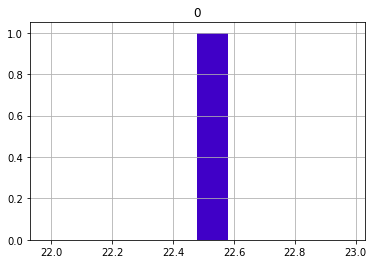

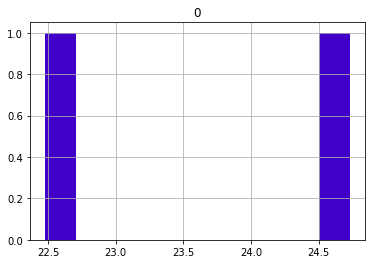

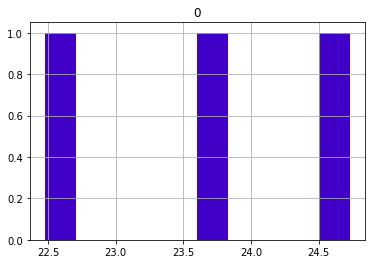

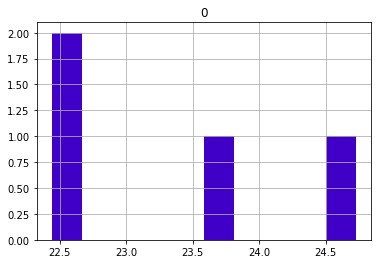

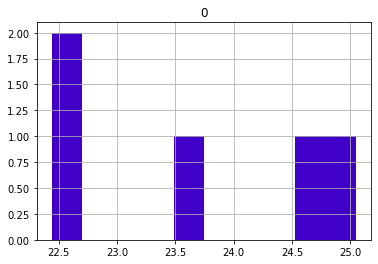

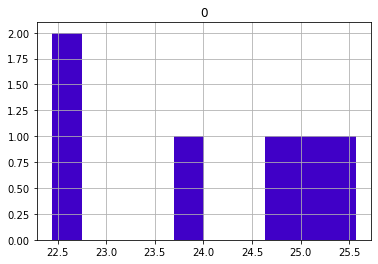

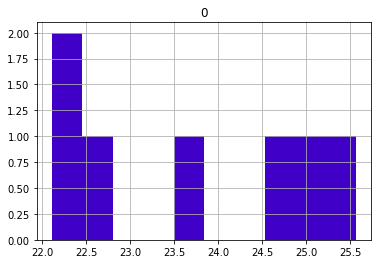

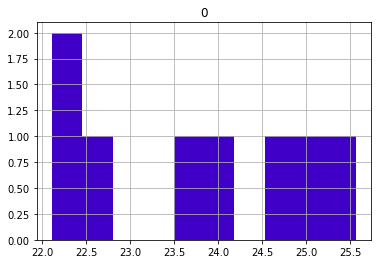

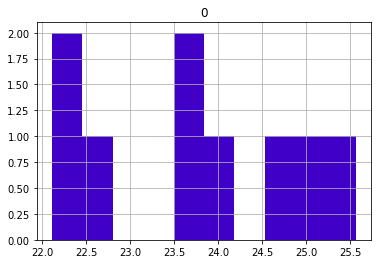

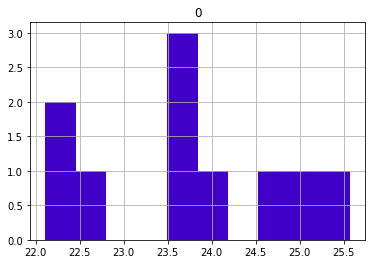

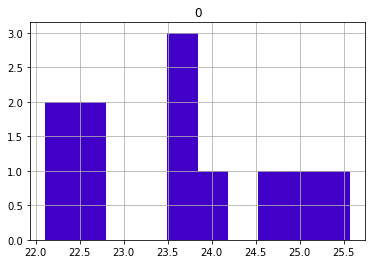

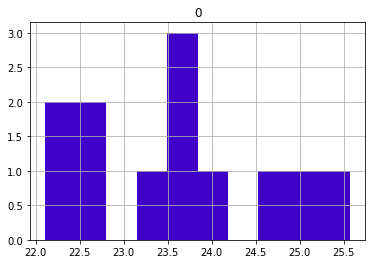

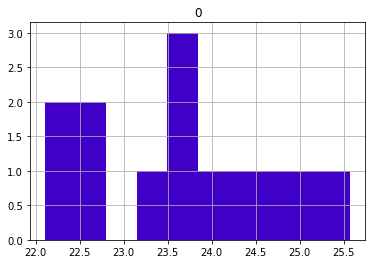

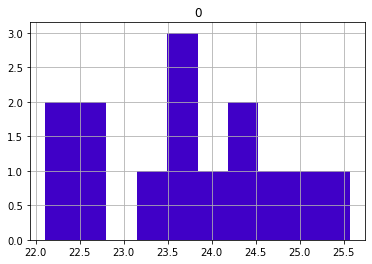

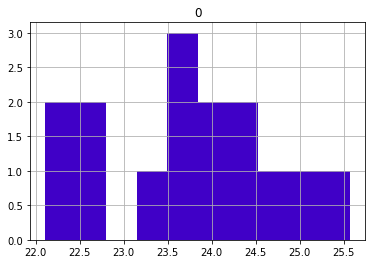

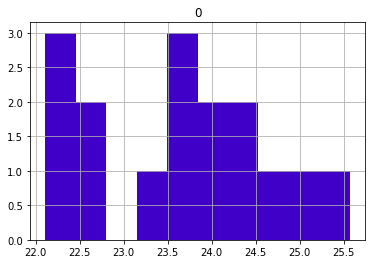

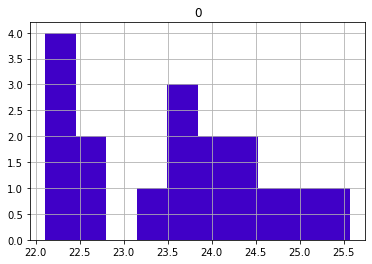

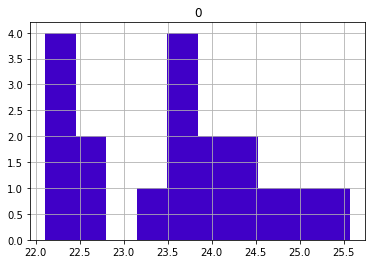

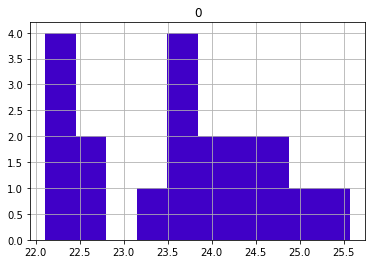

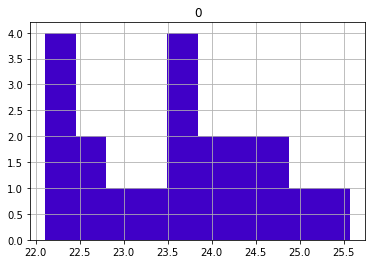

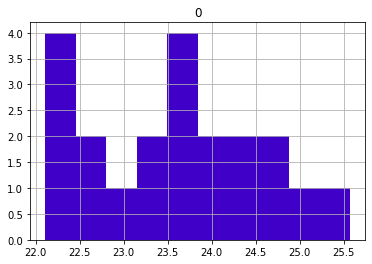

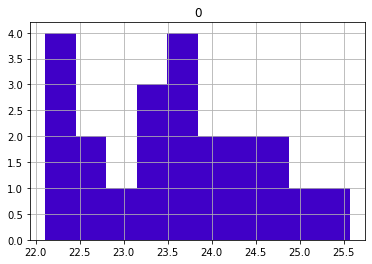

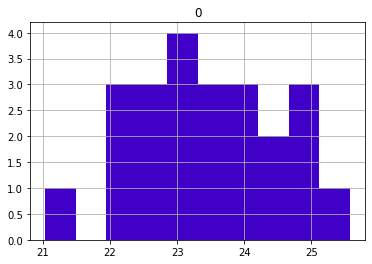

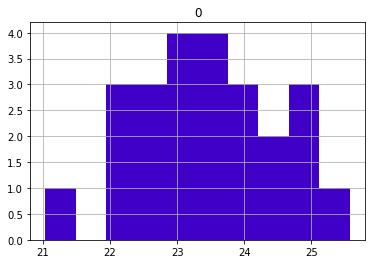

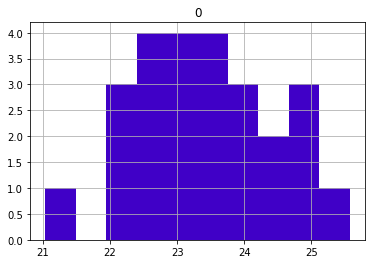

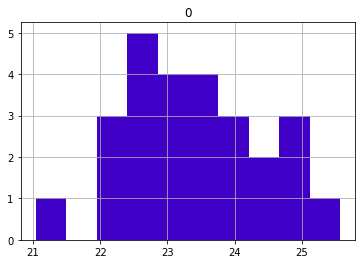

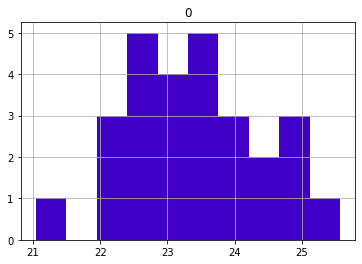

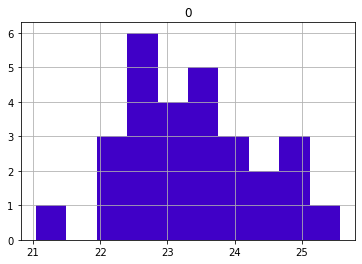

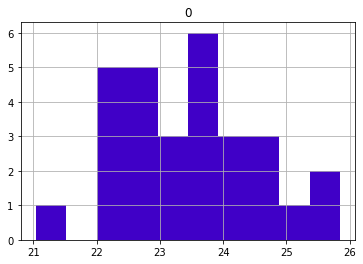

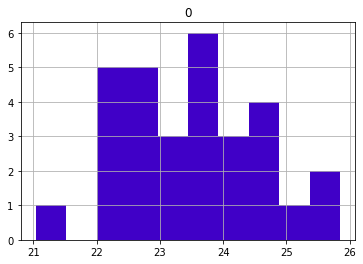

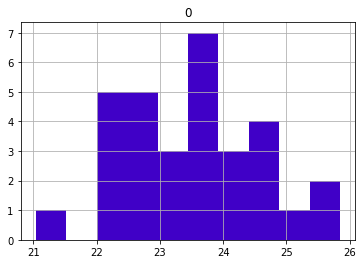

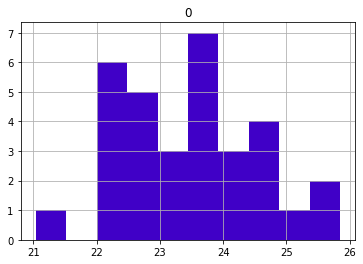

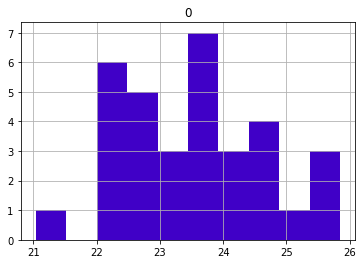

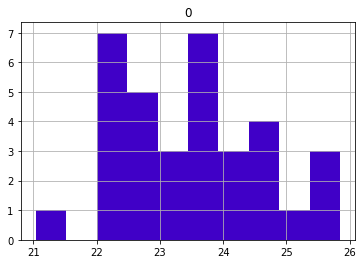

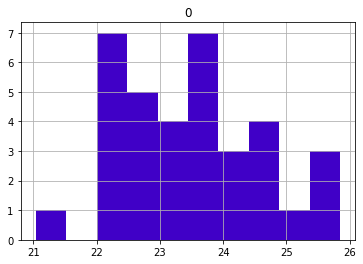

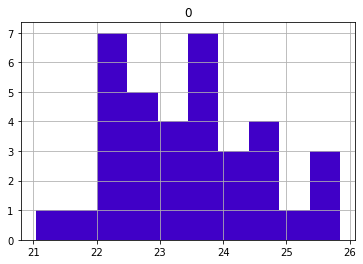

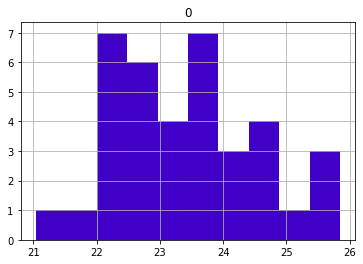

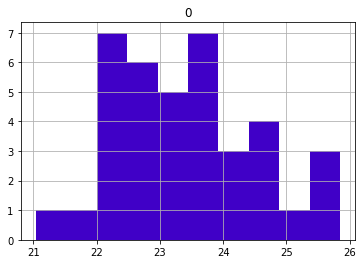

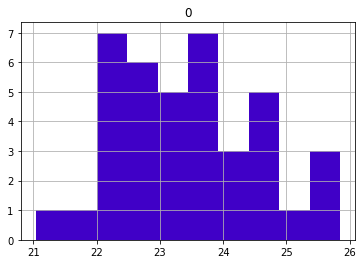

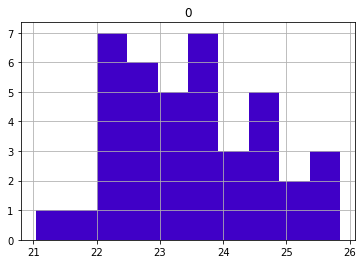

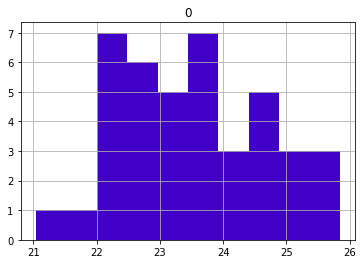

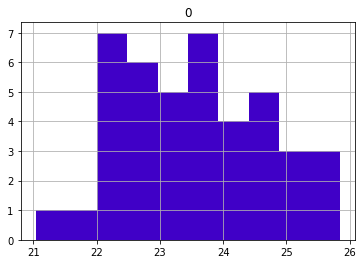

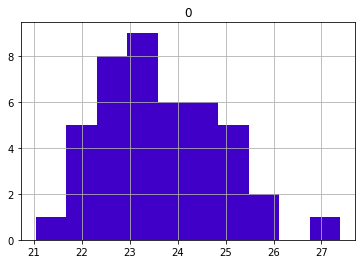

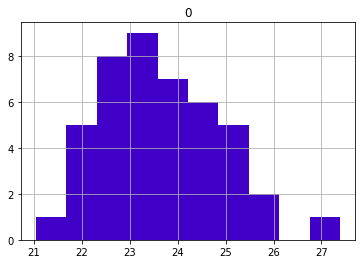

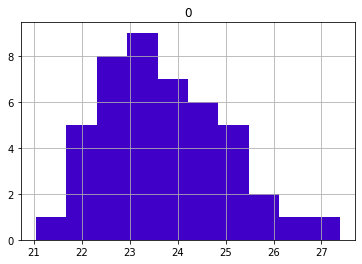

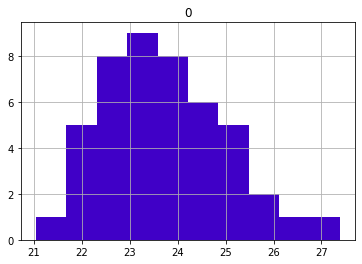

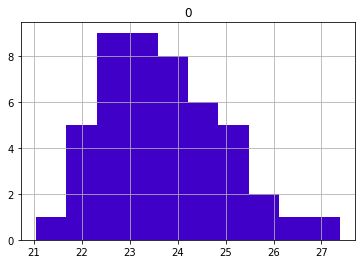

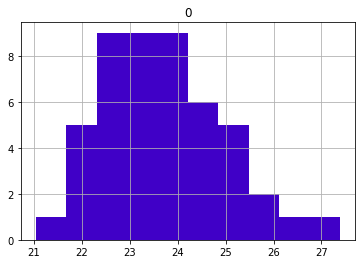

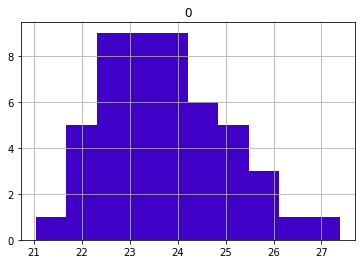

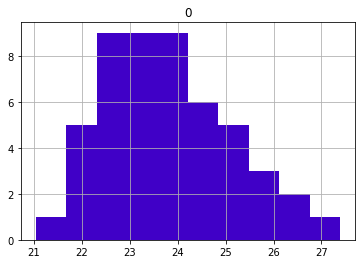

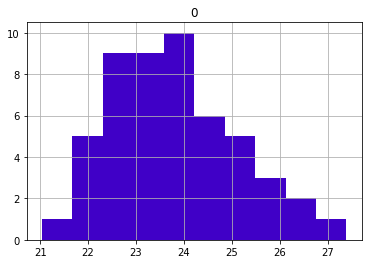

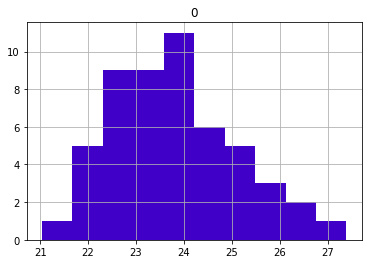

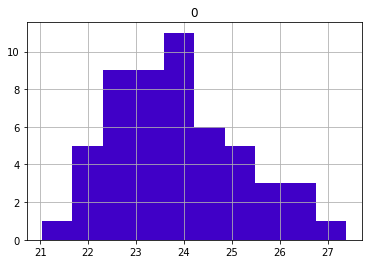

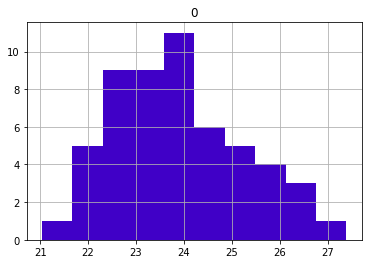

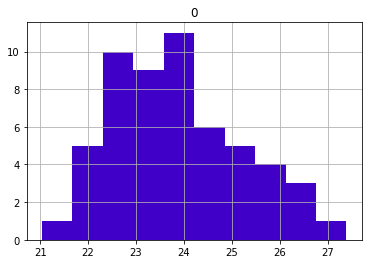

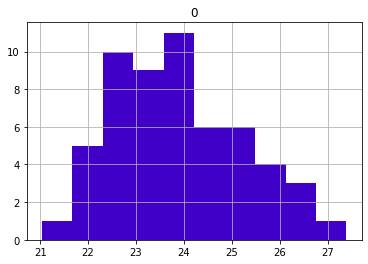

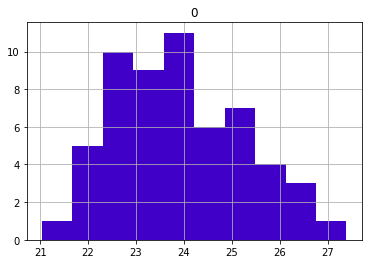

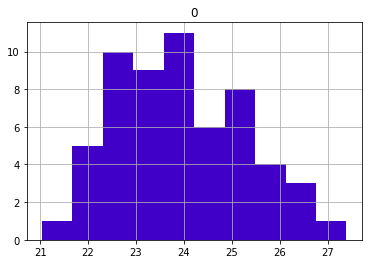

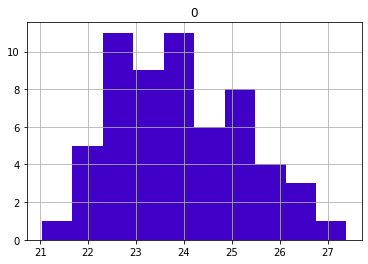

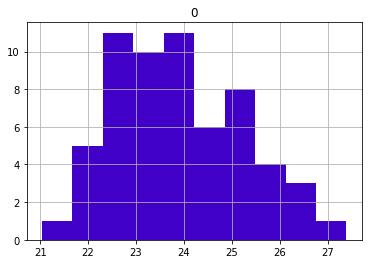

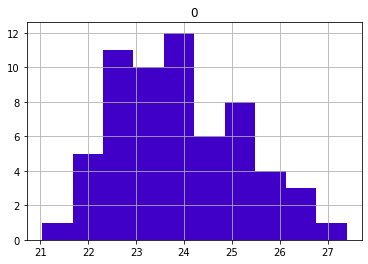

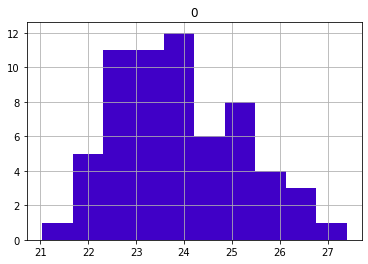

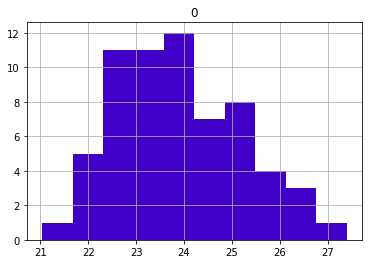

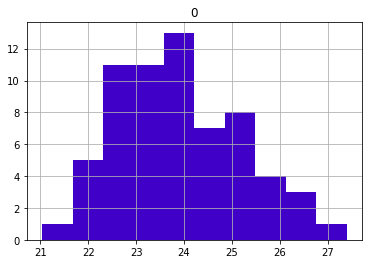

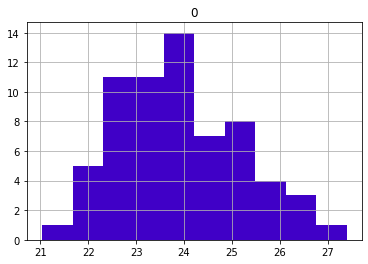

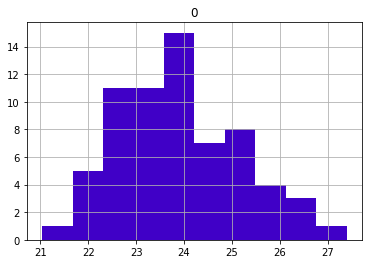

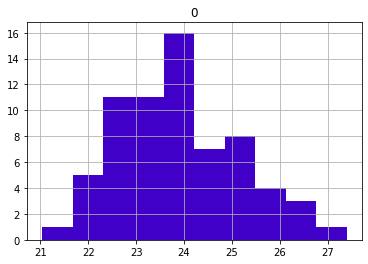

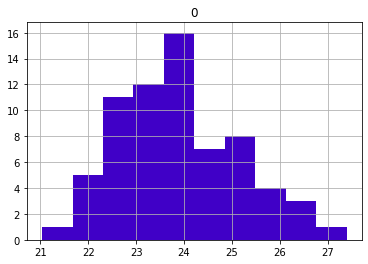

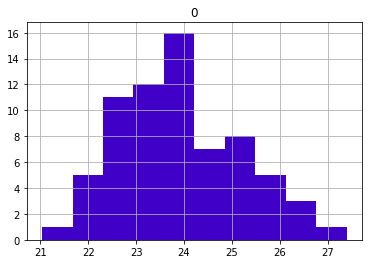

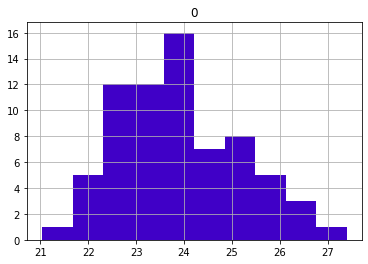

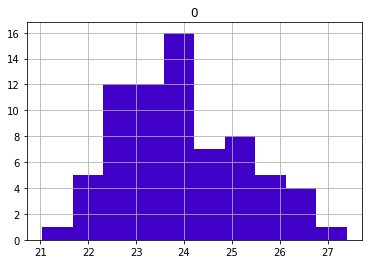

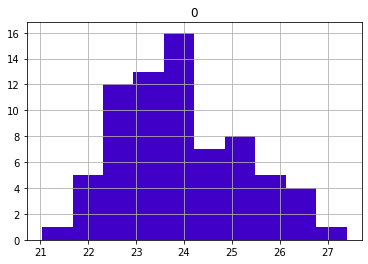

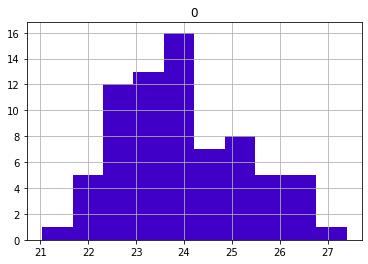

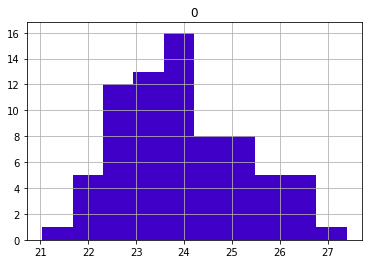

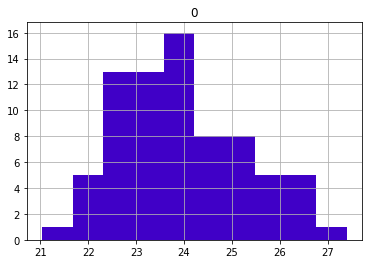

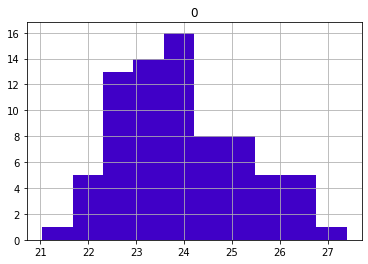

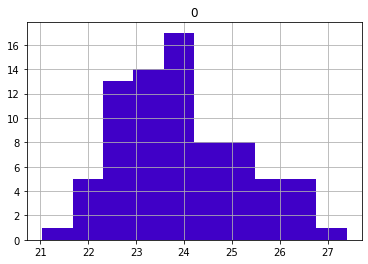

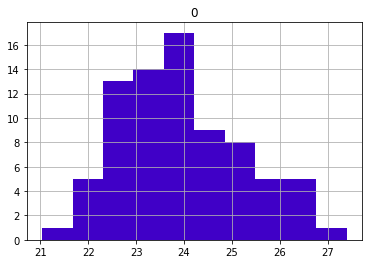

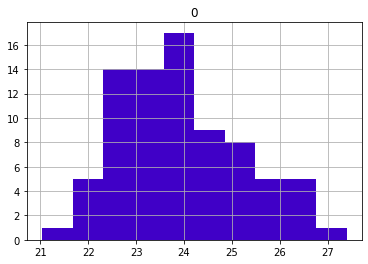

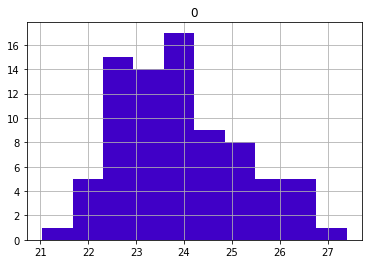

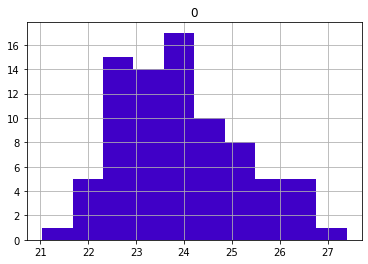

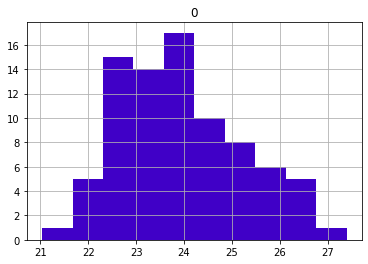

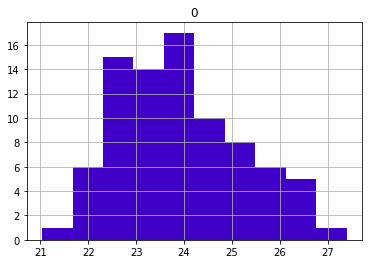

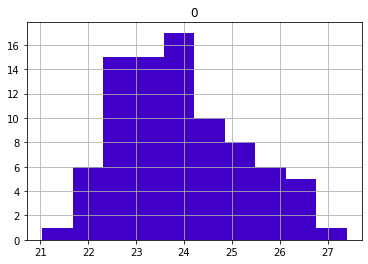

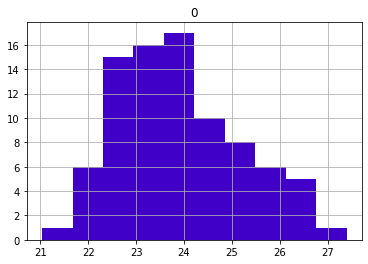

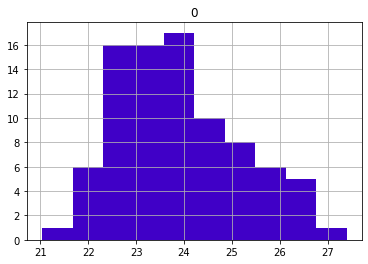

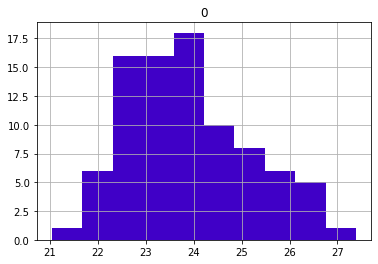

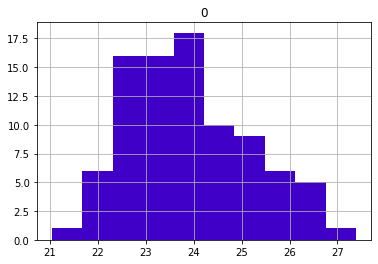

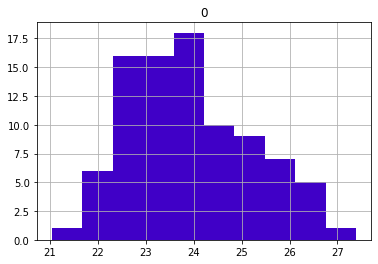

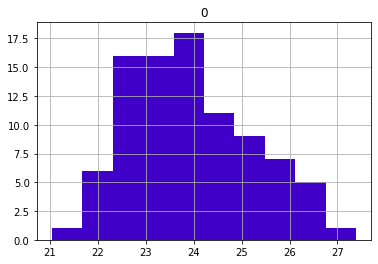

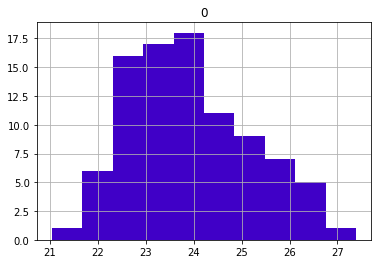

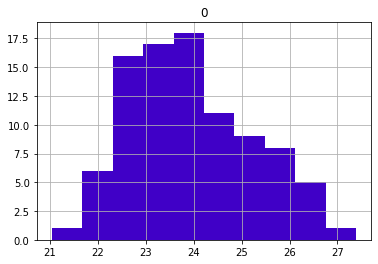

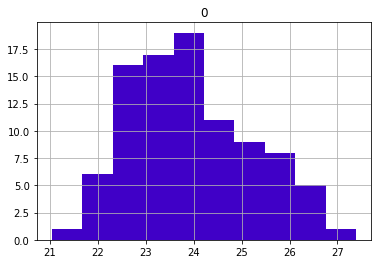

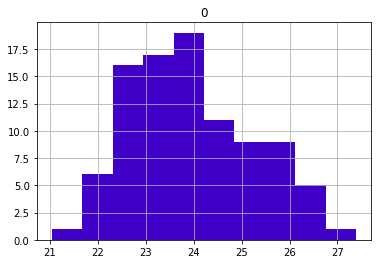

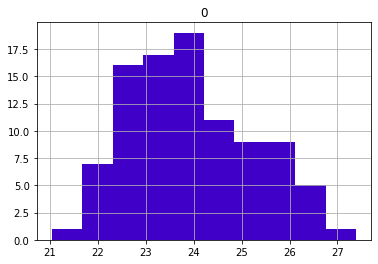

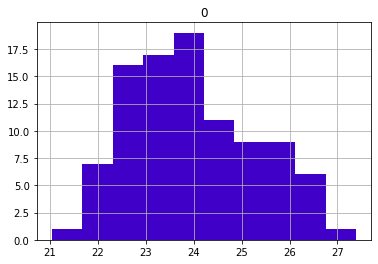

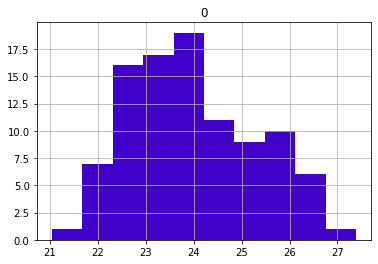

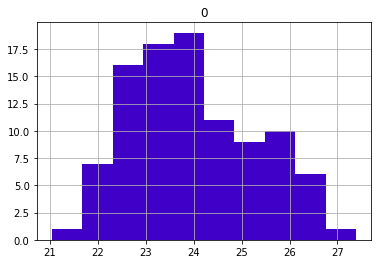

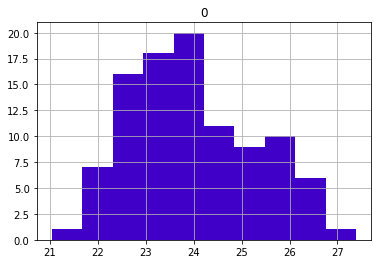

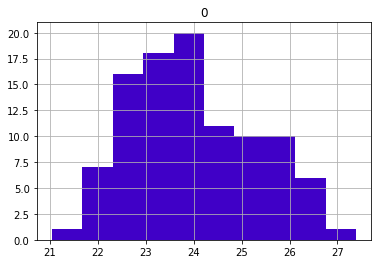

In [ ]:
#중심극한가설
s_mean= []

for x in range(0,100): #100번
 con = np.random.choice(df2, 100) #df2에서 100개의 샘플 뽑음
 s_mean.append(con.mean()) #100개의 표본의 평균 list에 넣기

 # 100개의 표본 평균 리스트의 분포
 pd.DataFrame(s_mean).hist(color = '#4000c7');